In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

data = pandas.read_csv('20250212_EC_decays.txt')
data.describe()

,Decay Times in Microseconds
count,1257.000000
mean,3.421448
std,3.931721
min,0.319997
25%,0.960001
50%,1.880002
75%,4.120004
max,20.319996


In [ ]:
cropped_data = data[data['Decay Times in Microseconds'] >= 0.3]
cropped_data = cropped_data[cropped_data['Decay Times in Microseconds'] <= 20]
cropped_data.describe()

,Decay Times in Microseconds
count,1255.000000
mean,3.394741
std,3.877424
min,0.319997
25%,0.960000
50%,1.879998
75%,4.120002
max,19.880012


array([242, 195, 167, 101,  81,  68,  53,  52,  41,  33,  25,  19,  18,
        14,  17,   6,   5,   5,   9,   9,   8,   9,   3,   6,   3,   5,
         9,   9,   2,   2,   4,   6,   4,   5,   2,   1,   5,   8,   2,
         2,   0])

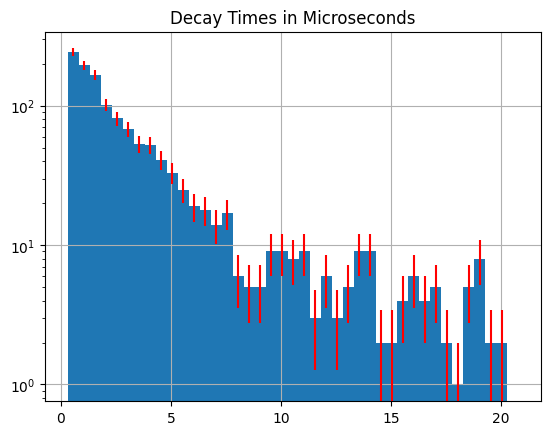

In [79]:
data_range = (0.3, max(data['Decay Times in Microseconds']))
bins = np.arange(0.3, max(data['Decay Times in Microseconds']) + 0.5, 0.5)
hist = cropped_data.hist(range=data_range, bins=bins)

values = np.histogram(cropped_data["Decay Times in Microseconds"], range=data_range, bins=bins)[0]
bincenters = 0.5*(bins[1:]+bins[:-1])

hist[0][0].errorbar(bincenters, values, yerr=np.sqrt(values), fmt='none', color='red')

hist[0][0].set_yscale('log')
values

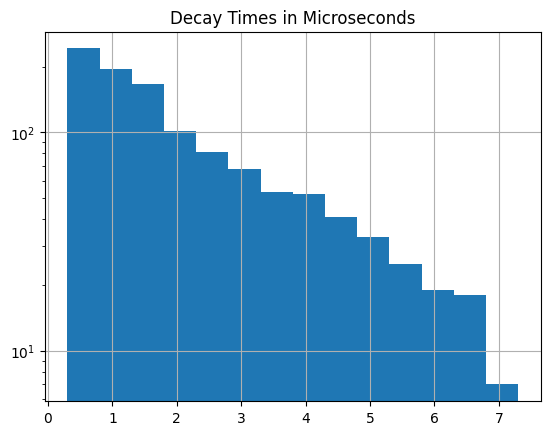

In [87]:
cropped_data_2 = cropped_data[cropped_data['Decay Times in Microseconds'] <= 7]
data_range = (0.3, max(cropped_data_2['Decay Times in Microseconds']))
bins = np.arange(0.3, max(cropped_data_2['Decay Times in Microseconds']) + 0.5, 0.5)
hist = cropped_data_2.hist(range=data_range, bins=bins)
hist[0][0].set_yscale('log')

times, bins = np.histogram(cropped_data_2, bins=bins, range=data_range)
times = np.log(times)
bins = bins[:-1]

In [88]:
line, cov = np.polyfit(bins, times, deg=1, cov=True)

coeff = unumpy.uarray(line, np.sqrt(np.diag(cov)))
coeff

array([-0.47310124716106117+/-0.0245690118244238,
       5.625239459215871+/-0.1002975555031522], dtype=object)

In [70]:
gamma = coeff[0]
tau = -1 / gamma
tau

2.1137124579584188+/-0.10976894836916962

In [ ]:
cropped_data_2.describe()

,Decay Times in Microseconds
count,1102.000000
mean,2.161488
std,1.617221
min,0.319997
25%,0.879998
50%,1.640000
75%,3.040010
max,6.960006
